In [2]:
import numpy as np
import pylab as plt
from scipy.stats import norm

### Part 1

- Generate fake measurements. Treat each of these observations as an estimate of the true distribution. So we'll center a Gaussian (with the known $\sigma$) at each point. This is the probability of each data point, $p(x_i|\mu,\sigma)$.

In [3]:
N = 5
mu = 1
sigma = 0.2 
np.random.seed(42) # If you don't understand why 42, take a crash course in pop culture!
sample = norm(mu,sigma).rvs(N)
print(sample)

[1.09934283 0.97234714 1.12953771 1.30460597 0.95316933]


- Plot each of the likelihoods separately.  Also plot their product. Make sure the x grid has enough points.


(5, 1000)


Text(0.5, 1.0, 'MLE for Gaussian Distribution')

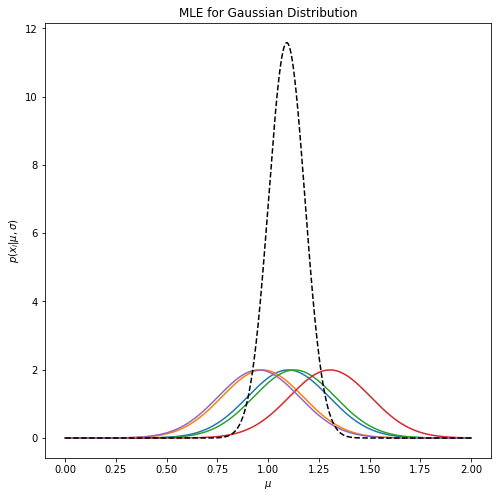

In [4]:
#Make the plot and see if you get the same as me.
xgrid = np.linspace(0,2,1000)

Ls = np.array([norm.pdf(xgrid,loc=s,scale=sigma) for s in sample])

print(Ls.shape)

L = np.prod(Ls,axis=0)

fig, ax = plt.subplots(figsize=(8, 8))
                       
                       
for thisL in Ls:
    plt.plot(xgrid, thisL, ls='-')
    
plt.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x\})$')

#plt.xlim(0.2, 1.8)
#plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')

- Just read off the maximum likelihood solution (checkout `np.argsort`) 


In [5]:
sorted_indices = np.argsort(L)
index_max = sorted_indices[-1]
print("Likelihood is maximized at %.3f" % xgrid[index_max])

Likelihood is maximized at 1.091


- Compare it with the MLE estimator derived above

In [6]:
MLest = np.mean(sample)
print("The mean is my estimator", MLest)

The mean is my estimator 1.0918005948650173


### Part 2

Let's check this with a quick and dirty calculation on our quasar measurements. Implement the following:
- do a rough $2^\mathrm{nd}$ order differentation of our log-likelihood function with `np.diff`, 
- divide through by our $\Delta \theta^2$ to get the correct normalization, 
- multiply by $-1$, 
- then take the square root.


In [7]:
sigma_mu = np.diff(np.log(L), n=2)
sigma_mu /= (xgrid[1]-xgrid[0])**2
sigma_mu *= -1
sigma_mu = 1/np.sqrt(sigma_mu)[0]

print("Fisher matrix error on estimated mean is %.3f" % sigma_mu)

Fisher matrix error on estimated mean is 0.089


- Compare with the Fisher matrix error derived above


In [8]:
MLEsigma = sigma/N**0.5
print("Fisher matrix error", MLEsigma)

Fisher matrix error 0.08944271909999159


- Plot a Gaussian at the measured $\mu$ with this error as the scale to see if it matches the numerical likelihood distribution. (The normalization won't be captured, you can rescale it as you like to check it agrees) 

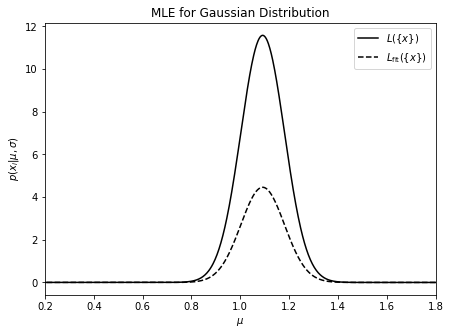

In [16]:
# Execute the following cell
# complete the following for measured mean and Fisher error
Lfit = norm.pdf(xgrid,loc=MLest,scale=MLEsigma)  

fig, ax = plt.subplots(figsize=(7, 5))

# plot numerical likelihood
plt.plot(xgrid, L , ls='-', c='black', 
         label=r'$L(\{x\})$')

# plot fitted Gaussian with arbitrary normalizing constant
# offset for ease of viewing
C = 1
plt.plot(xgrid, C*Lfit, ls='dashed', 
         c='black', label=r'$L_\mathrm{fit}(\{x\})$')

plt.xlim(0.2, 1.8)
#plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')
plt.legend()

Looks great!

### Part 3

Repeat with heteroscedastic measurements

In [21]:
N = 5
mu = 1
sigma = norm(0.2,0.05).rvs(N)
np.random.seed(42) # If you don't understand why 42, take a crash course in pop culture!
sample = np.concatenate([norm(mu,s).rvs(1) for s in sigma])
print(sample)

[1.09352787 0.9614297  1.15439064 1.2688548  0.94681721]


(5, 1000)


Text(0.5, 1.0, 'MLE for Gaussian Distribution')

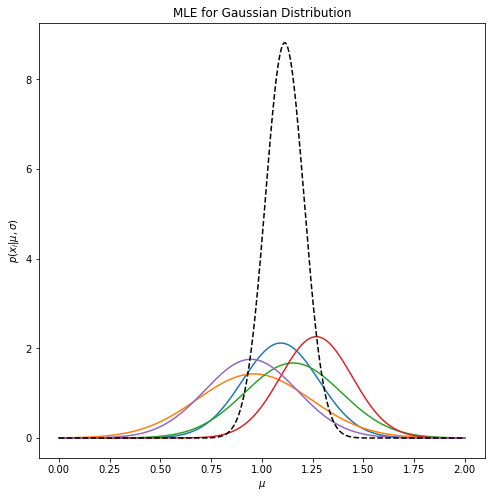

In [23]:
xgrid = np.linspace(0,2,1000)


Ls = np.array([norm.pdf(xgrid,loc=s,scale=ss) for s,ss in zip(sample,sigma)])

print(Ls.shape)

L = np.prod(Ls,axis=0)

fig, ax = plt.subplots(figsize=(8, 8))
                       
                       
for thisL in Ls:
    plt.plot(xgrid, thisL, ls='-')
    
plt.plot(xgrid, L, ls='--', c='black', label=r'$L(\{x\})$')

#plt.xlim(0.2, 1.8)
#plt.ylim(0, 8.0)
plt.xlabel('$\mu$') #Leave out or adjust if no latex
plt.ylabel(r'$p(x_i|\mu,\sigma)$') #Leave out or adjust if no latex
plt.title('MLE for Gaussian Distribution')

In [25]:
sorted_indices = np.argsort(L)
index_max = sorted_indices[-1]
print("Likelihood is maximized at %.3f" % xgrid[index_max])

Likelihood is maximized at 1.113


In [31]:
MLest = np.average(sample,weights=1/sigma**2)
print("The mean is my estimator", MLest)

The mean is my estimator 1.1131053846960444


In [32]:
sigma_mu = np.diff(np.log(L), n=2)
sigma_mu /= (xgrid[1]-xgrid[0])**2
sigma_mu *= -1
sigma_mu = 1/np.sqrt(sigma_mu)[0]

print("Fisher matrix error on estimated mean is %.3f" % sigma_mu)

Fisher matrix error on estimated mean is 0.095


In [33]:
MLEsigma = np.sum(sigma**-2)**-0.5
print("Fisher matrix error", MLEsigma)

Fisher matrix error 0.09528984929090246
